## Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
#Engine’s five rotating components (Fan, LPC, HPC, HPT and LPT).
Cols = ['Unit','Cycle','Setting1','Setting2','Setting3',
           'Fan °R1', 'LPC °R2', 'HPC °R3','LPT °R4',
           'Fan Psia5', 'Bypass-duct psia6','HPC psia7',
           'Fan rpm8','Core rpm9', 'Engin P ratio10', 'Hpc psia11',
           'Ratio of fuel12','Corrected fan rpm13', 'Corrected core rpm14',
           'Bypass ratio15', 'Burner fuel-air ratio16','BE17','Demanded fan speed18',
           'Demanded corrected fan speed19','HPT coolant bleed lbm/s20','LPT coolant bleed lbm/s21','s22','s23']

In [6]:
#load training data
df = pd.read_csv('PM_train.txt',sep = ' ',header = None)

In [7]:
# Load truth rul data
df_truth = pd.read_csv('PM_truth.txt', header = None)
df_truth = df_truth.reset_index()
df_truth.columns = ['Unit','True max cycle']
df_truth['Unit'] = df_truth['Unit'].apply(lambda x: x+1)
df_truth

,Unit,True max cycle
0,1,112
1,2,98
2,3,69
3,4,82
4,5,91
...,...,...
95,96,137
96,97,82
97,98,59
98,99,117


In [8]:
df.columns = Cols
df.head()

,Unit,Cycle,Setting1,Setting2,Setting3,Fan °R1,LPC °R2,HPC °R3,LPT °R4,Fan Psia5,...,Corrected core rpm14,Bypass ratio15,Burner fuel-air ratio16,BE17,Demanded fan speed18,Demanded corrected fan speed19,HPT coolant bleed lbm/s20,LPT coolant bleed lbm/s21,s22,s23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [9]:
df.describe()

,Unit,Cycle,Setting1,Setting2,Setting3,Fan °R1,LPC °R2,HPC °R3,LPT °R4,Fan Psia5,...,Corrected core rpm14,Bypass ratio15,Burner fuel-air ratio16,BE17,Demanded fan speed18,Demanded corrected fan speed19,HPT coolant bleed lbm/s20,LPT coolant bleed lbm/s21,s22,s23
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [10]:
df[df['Unit'] == 1]

,Unit,Cycle,Setting1,Setting2,Setting3,Fan °R1,LPC °R2,HPC °R3,LPT °R4,Fan Psia5,...,Corrected core rpm14,Bypass ratio15,Burner fuel-air ratio16,BE17,Demanded fan speed18,Demanded corrected fan speed19,HPT coolant bleed lbm/s20,LPT coolant bleed lbm/s21,s22,s23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,NaN,NaN
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,NaN,NaN
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,NaN,NaN
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,NaN,NaN


In [11]:
df.shape

(20631, 28)

In [12]:
df.isnull().sum(axis = 0)

Unit                                  0
Cycle                                 0
Setting1                              0
Setting2                              0
Setting3                              0
Fan °R1                               0
LPC °R2                               0
HPC °R3                               0
LPT °R4                               0
Fan Psia5                             0
Bypass-duct psia6                     0
HPC psia7                             0
Fan rpm8                              0
Core rpm9                             0
Engin P ratio10                       0
Hpc psia11                            0
Ratio of fuel12                       0
Corrected fan rpm13                   0
Corrected core rpm14                  0
Bypass ratio15                        0
Burner fuel-air ratio16               0
BE17                                  0
Demanded fan speed18                  0
Demanded corrected fan speed19        0
HPT coolant bleed lbm/s20             0


In [13]:
df = df.drop(['s22','s23'],axis = 1)

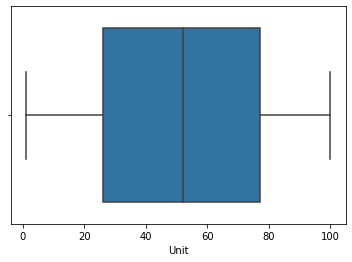

In [14]:
# unit is each engine number
sns.boxplot(df['Unit'])

In [15]:
df['Unit'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [16]:
df['Cycle'].value_counts()

16     100
40     100
1      100
17     100
2      100
      ... 
357      1
356      1
355      1
354      1
351      1
Name: Cycle, Length: 362, dtype: int64

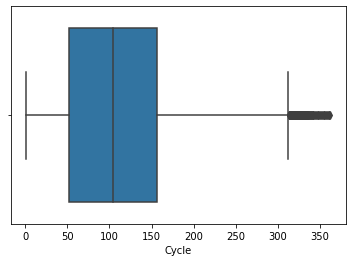

In [17]:
# Cycle number is also used to define how many cycles (time) has passed at the given data point. 
sns.boxplot(df['Cycle'])

In [18]:
df.columns

Index(['Unit', 'Cycle', 'Setting1', 'Setting2', 'Setting3', 'Fan °R1',
       'LPC °R2', 'HPC °R3', 'LPT °R4', 'Fan Psia5', 'Bypass-duct psia6',
       'HPC psia7', 'Fan rpm8', 'Core rpm9', 'Engin P ratio10', 'Hpc psia11',
       'Ratio of fuel12', 'Corrected fan rpm13', 'Corrected core rpm14',
       'Bypass ratio15', 'Burner fuel-air ratio16', 'BE17',
       'Demanded fan speed18', 'Demanded corrected fan speed19',
       'HPT coolant bleed lbm/s20', 'LPT coolant bleed lbm/s21'],
      dtype='object')

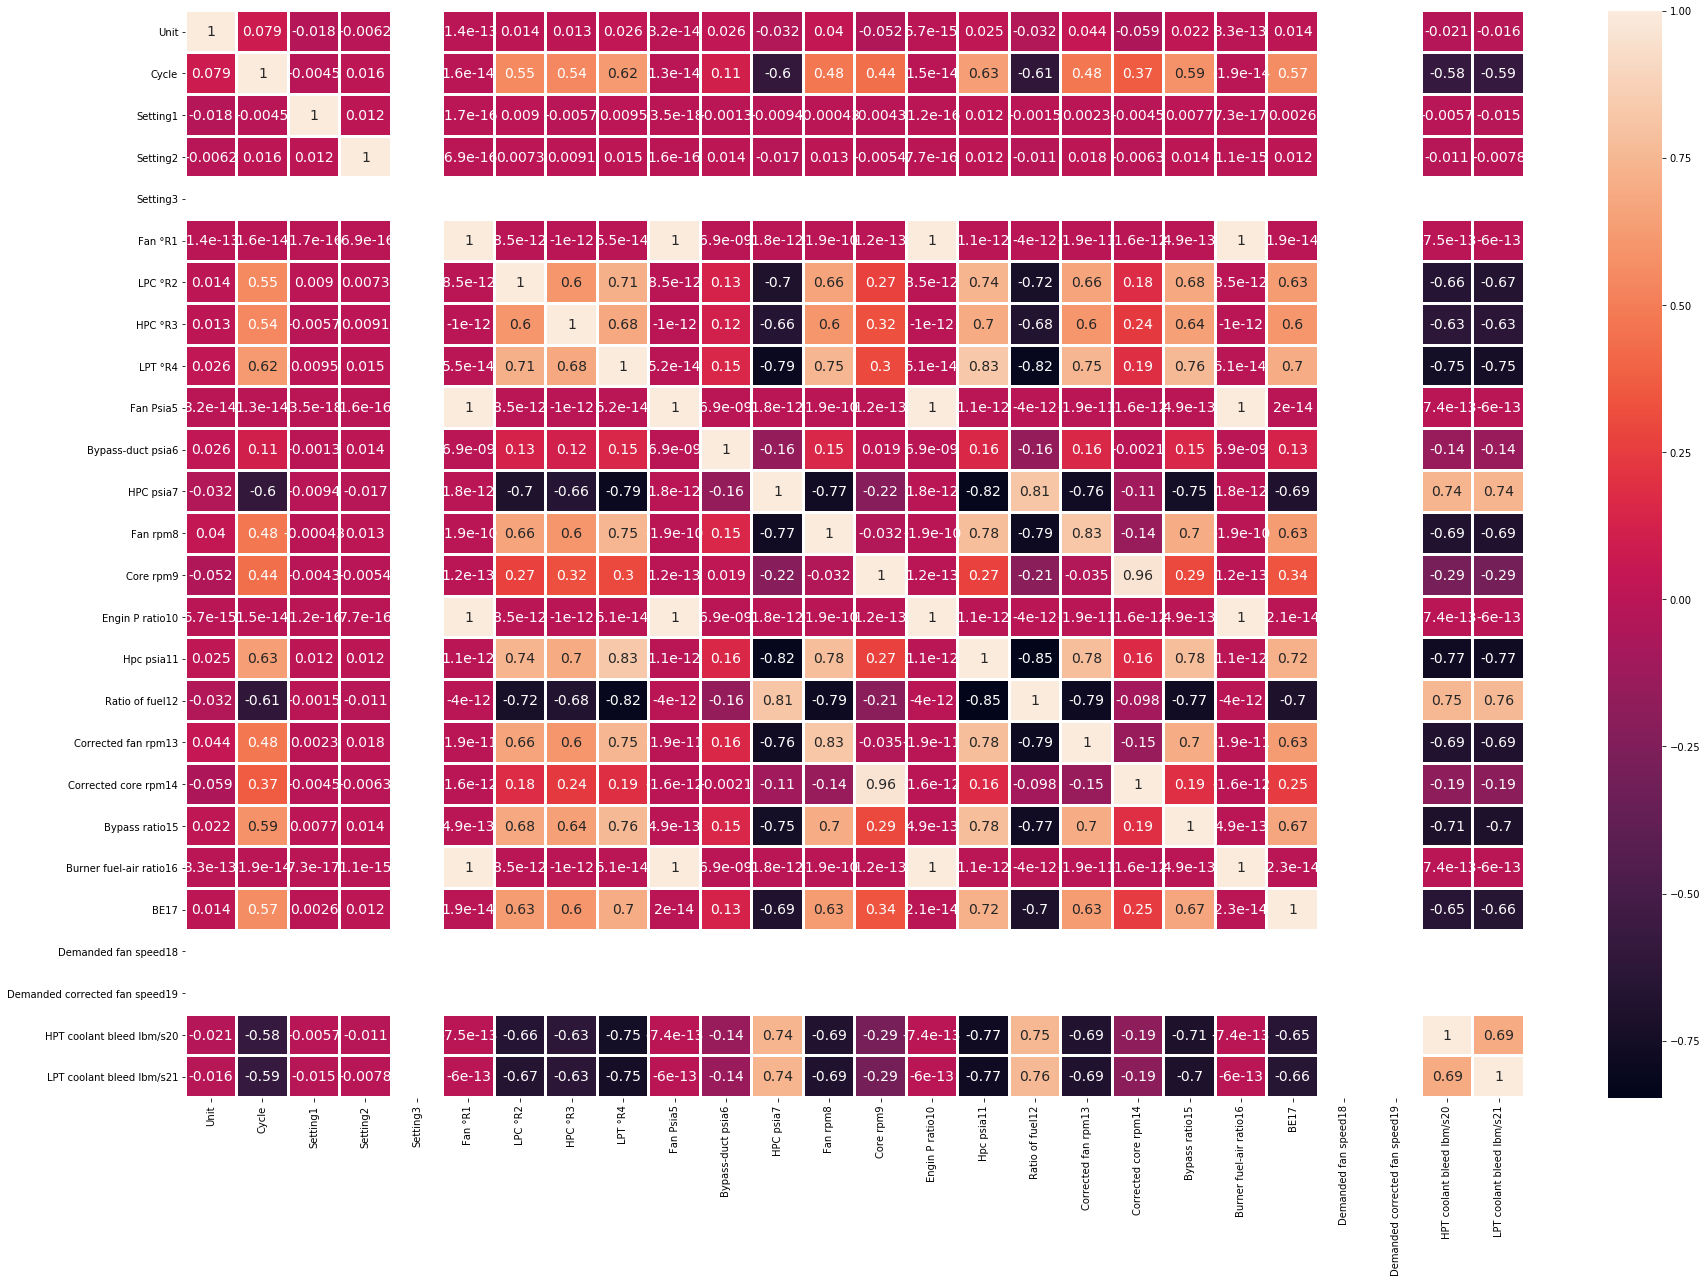

In [14]:
df_corr = df.corr()
plt.figure(figsize = (30,20))
sns.heatmap(df_corr,vmax = 1,annot_kws={"size": 14},annot=True,linewidths=2, xticklabels=1)

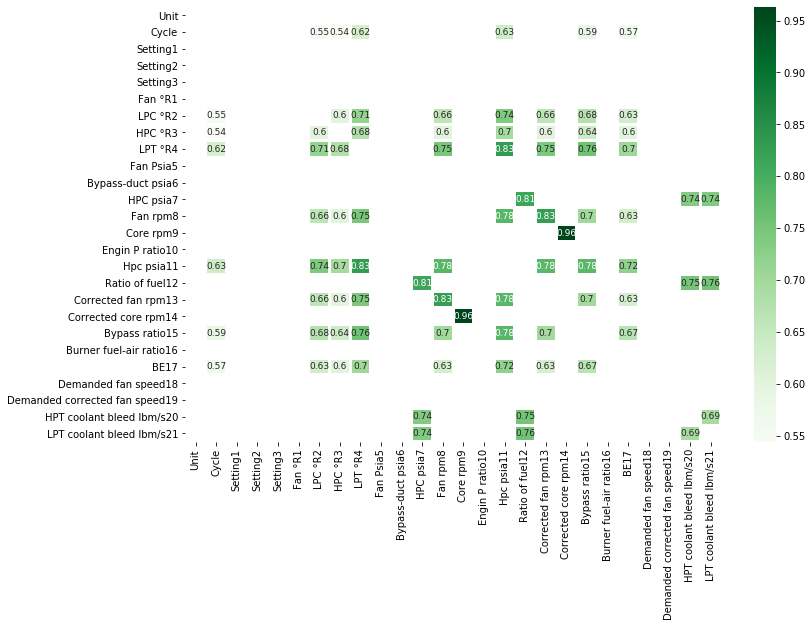

In [15]:
# Correlation > 0.5 
corr_lim = df_corr[((df_corr >=0.5) & (df_corr < 1))]
plt.figure(figsize=(12,8))
sns.heatmap(corr_lim,cmap = 'Greens',annot_kws={"size": 9},annot=True,linewidths=2, xticklabels=1)

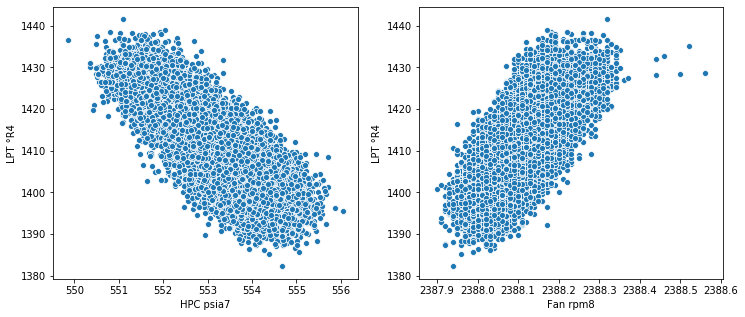

In [16]:
# Sensor4 and sensor11 0.83, sensor4 sensor 8 0.75
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot('HPC psia7','LPT °R4', data = df, ax = axes[0])
sns.scatterplot('Fan rpm8','LPT °R4', data = df, ax = axes[1])

In [17]:
# apply the min-max scaling(Normalize) in pandas 
def min_max_scaling(df):
    # copy the data frame
    df_norm = df.copy()
    # apply in min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
    return df_norm

In [18]:
df_d = df.drop(['Unit','Cycle'],axis = 1)
df_n = min_max_scaling(df_d)

In [19]:
# Concat with Unit
df_unit = df[['Unit','Cycle']]
df_n = pd.concat([df_unit,df_n],axis = 1)
# df_n.columns = df_n.columns.get_level_values(0)
df_n.describe()

,Unit,Cycle,Setting1,Setting2,Setting3,Fan °R1,LPC °R2,HPC °R3,LPT °R4,Fan Psia5,...,Ratio of fuel12,Corrected fan rpm13,Corrected core rpm14,Bypass ratio15,Burner fuel-air ratio16,BE17,Demanded fan speed18,Demanded corrected fan speed19,HPT coolant bleed lbm/s20,LPT coolant bleed lbm/s21
count,20631.000000,20631.000000,20631.000000,20631.000000,0.0,0.0,20631.000000,20631.000000,20631.000000,0.0,...,20631.000000,20631.000000,20631.000000,20631.000000,0.0,20631.000000,0.0,0.0,20631.000000,20631.000000
mean,51.506568,108.807862,0.499490,0.501959,NaN,NaN,0.443052,0.424746,0.450435,NaN,...,0.580697,0.317871,0.226095,0.451118,NaN,0.434221,NaN,NaN,0.524241,0.546127
std,29.227633,68.880990,0.125708,0.244218,NaN,NaN,0.150618,0.133664,0.151935,NaN,...,0.157261,0.105763,0.098442,0.144306,NaN,0.129064,NaN,NaN,0.140114,0.149476
min,1.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000
25%,26.000000,52.000000,0.413793,0.333333,NaN,NaN,0.335843,0.331807,0.339467,NaN,...,0.484009,0.235294,0.171870,0.346287,NaN,0.333333,NaN,NaN,0.434109,0.452361
50%,52.000000,104.000000,0.500000,0.500000,NaN,NaN,0.430723,0.415522,0.435348,NaN,...,0.594883,0.308824,0.209516,0.438630,NaN,0.416667,NaN,NaN,0.534884,0.557443
75%,77.000000,156.000000,0.586207,0.750000,NaN,NaN,0.539157,0.508829,0.545324,NaN,...,0.695096,0.382353,0.249613,0.541362,NaN,0.500000,NaN,NaN,0.627907,0.652582
max,100.000000,362.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000


In [20]:
unit1 = df_n[df_n['Unit'] == 1]
sensors =['Fan °R1', 'LPC °R2', 'HPC °R3','LPT °R4',
           'Fan Psia5', 'Bypass-duct psia6','HPC psia7',
           'Fan rpm8','Core rpm9', 'Engin P ratio10', 'Hpc psia11',
           'Ratio of fuel12','Corrected fan rpm13', 'Corrected core rpm14',
           'Bypass ratio15', 'Burner fuel-air ratio16','BE17','Demanded fan speed18',
           'Demanded corrected fan speed19','HPT coolant bleed lbm/s20','LPT coolant bleed lbm/s21']

Text(0, 0.5, 'Sensors')

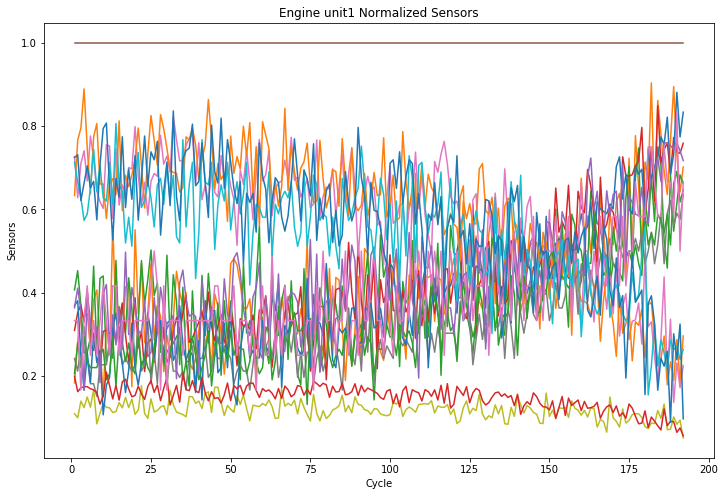

In [21]:
plt.figure(figsize = (12,8))
for i in sensors:
    sns.lineplot(x = unit1['Cycle'], y = unit1[i],ci = None)
plt.title('Engine unit1 Normalized Sensors')
plt.xlabel('Cycle')
plt.ylabel('Sensors')

In [22]:
# apply the standardized
def standardized(df):
    # copy the data frame
    df_std = df.copy()
    # apply in min-max scaling
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / (df_std[column].std())
    return df_std

In [23]:
df_std = df.drop(['Unit','Cycle'],axis = 1)
df_s = standardized(df_std)
# Concat with Unit
df_s = pd.concat([df_unit,df_s],axis = 1)
unit1_s = df_s[df_s['Unit'] == 1]

In [142]:
df_s

,Unit,Cycle,Setting1,Setting2,Setting3,Fan °R1,LPC °R2,HPC °R3,LPT °R4,Fan Psia5,...,Ratio of fuel12,Corrected fan rpm13,Corrected core rpm14,Bypass ratio15,Burner fuel-air ratio16,BE17,Demanded fan speed18,Demanded corrected fan speed19,HPT coolant bleed lbm/s20,LPT coolant bleed lbm/s21
0,1,1,-0.315972,-1.372920,NaN,0.999976,-1.721684,-0.134252,-0.925914,0.999976,...,0.334254,-1.058865,-0.269065,-0.603801,0.999976,-0.781691,NaN,NaN,1.348460,1.194398
1,1,2,0.872701,-1.031695,NaN,0.999976,-1.061754,0.211523,-0.643710,0.999976,...,1.174871,-0.363637,-0.642829,-0.275845,0.999976,-0.781691,NaN,NaN,1.016503,1.236892
2,1,3,-1.961827,1.015652,NaN,0.999976,-0.661797,-0.413156,-0.525940,0.999976,...,1.364688,-0.919819,-0.551616,-0.649128,0.999976,-2.073044,NaN,NaN,0.739873,0.503411
3,1,4,0.324083,-0.008022,NaN,0.999976,-0.661797,-1.261284,-0.784812,0.999976,...,1.961255,-0.224592,-0.520163,-1.971617,0.999976,-0.781691,NaN,NaN,0.352590,0.777773
4,1,5,-0.864590,-0.690471,NaN,0.999976,-0.621801,-1.251498,-0.301511,0.999976,...,1.052846,-0.780774,-0.521736,-0.339837,0.999976,-0.136014,NaN,NaN,0.463242,1.059526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.178817,-1.031695,NaN,0.999976,1.617961,1.216229,2.188322,0.999976,...,-2.607906,2.278227,-0.322534,1.425260,0.999976,2.446692,NaN,NaN,-1.805129,-2.921042
20627,100,197,-0.727436,-1.714145,NaN,0.999976,1.717950,2.279651,2.738285,0.999976,...,-2.350298,1.722045,-0.380198,1.913194,0.999976,1.155339,NaN,NaN,-2.856326,-1.203735
20628,100,198,0.186928,-0.008022,NaN,0.999976,1.477975,1.946924,2.138325,0.999976,...,-1.902872,2.000136,-0.141680,3.265013,0.999976,3.092369,NaN,NaN,-2.081760,-3.292402
20629,100,199,-0.498845,1.015652,NaN,0.999976,1.098016,2.403608,1.955004,0.999976,...,-2.363856,1.861090,-0.233942,2.579771,0.999976,1.155339,NaN,NaN,-2.911652,-2.085021


Text(0, 0.5, 'Sensors')

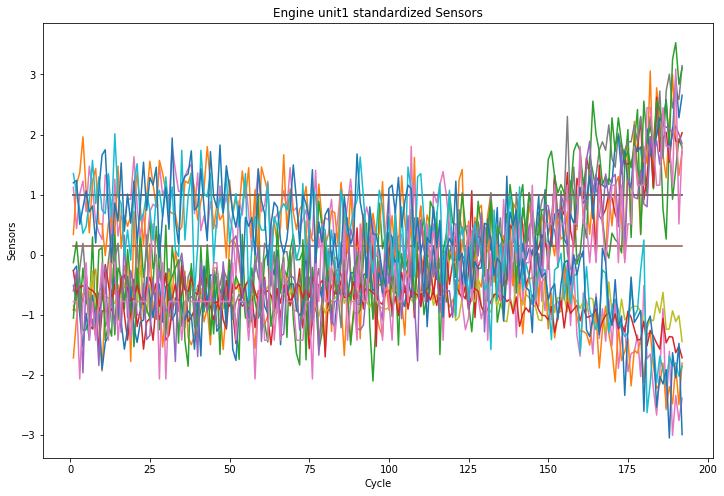

In [25]:
plt.figure(figsize = (12,8))
for i in sensors:
    sns.lineplot(x = unit1_s['Cycle'], y = unit1_s[i],ci = None)

plt.title('Engine unit1 standardized Sensors')
plt.xlabel('Cycle')
plt.ylabel('Sensors')

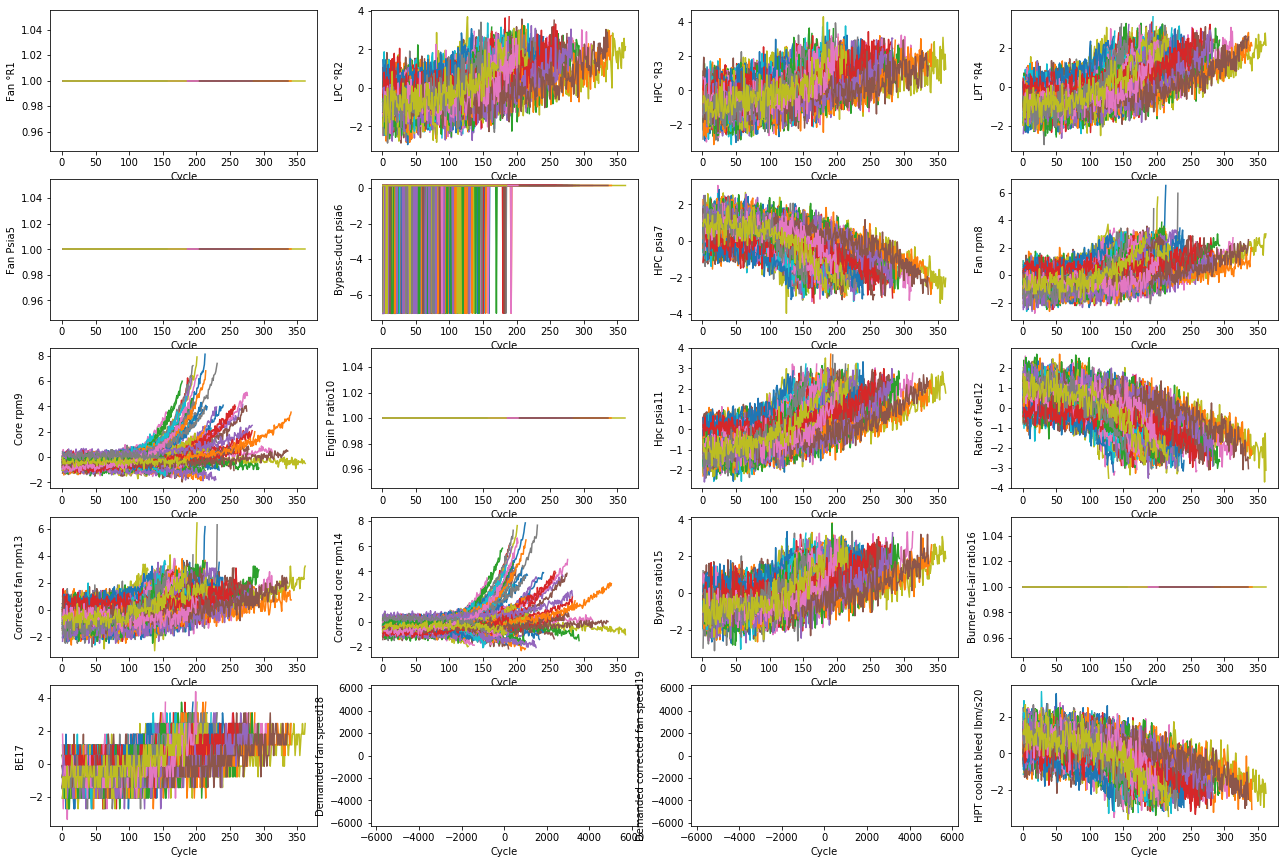

In [153]:
f, axes = plt.subplots(5,4,figsize = (22,15))
for i in range(1,100,1):
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[0]], ax = axes[0,0])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[1]], ax = axes[0,1])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[2]], ax = axes[0,2])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[3]], ax = axes[0,3])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[4]], ax = axes[1,0])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[5]], ax = axes[1,1])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[6]], ax = axes[1,2])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[7]], ax = axes[1,3])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[8]], ax = axes[2,0])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[9]], ax = axes[2,1])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[10]], ax = axes[2,2])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[11]], ax = axes[2,3])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[12]], ax = axes[3,0])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[13]], ax = axes[3,1])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[14]], ax = axes[3,2])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[15]], ax = axes[3,3])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[16]], ax = axes[4,0])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[17]], ax = axes[4,1])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[18]], ax = axes[4,2])
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[19]], ax = axes[4,3])

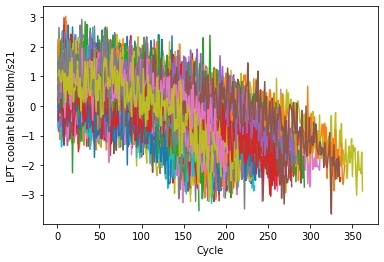

In [154]:
# Sensor 21
for i in range(1,100,1):
    sns.lineplot(x = df_s[df_s['Unit'] == i]['Cycle'], y= df_s[df_s['Unit'] == i][sensors[20]])

Text(0, 0.5, 'Sensors')

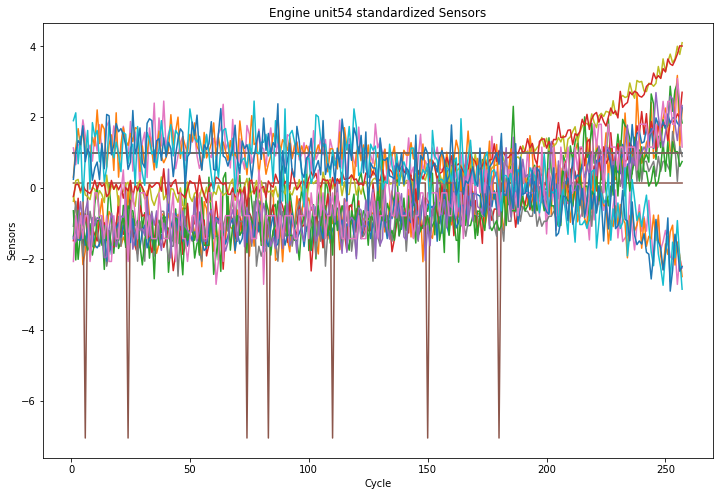

In [26]:
# engine unit54
unit54_s = df_s[df_s['Unit'] == 54]
plt.figure(figsize = (12,8))
for i in sensors:
    sns.lineplot(x = unit54_s['Cycle'], y = unit54_s[i],ci = None)

plt.title('Engine unit54 standardized Sensors')
plt.xlabel('Cycle')
plt.ylabel('Sensors')

Our data has strong correlation between differnet sensors

In [19]:
# #Threshhold
# threshold = 30

# retrieve the max cycles per engine: RUL
train_rul = pd.DataFrame(df.groupby('Unit')['Cycle'].max()).reset_index()

# merge the RULs into the training data
train_rul.columns = ['Unit','Max']
train_df = df.merge(train_rul, on =['Unit'], how = 'left')

# add the current RUL for every cycle
train_df['RUL'] = train_df['Max'] - train_df['Cycle']
train_df.drop('Max', axis = 1, inplace = True)

# #Calculate the failture cycle

# train_df['Fail'] = train_df['Cycle'].apply(lambda x: 0 if x >= threshold else 1 )

In [20]:
train_setting = df.groupby('Unit')[['Setting1','Setting2']].mean()
train_setting.first

<bound method NDFrame.first of       Setting1  Setting2
Unit                    
1    -0.000189  0.000048
2     0.000051  0.000088
3     0.000137 -0.000014
4     0.000150  0.000067
5     0.000136 -0.000061
...        ...       ...
96   -0.000120  0.000027
97   -0.000059  0.000077
98    0.000269 -0.000066
99   -0.000185  0.000017
100  -0.000148 -0.000086

[100 rows x 2 columns]>

In [21]:
def mean_prediction_score (RUL_True, RUL_pred):
    d = RUL_pred - RUL_true
    a1 = 10
    a2 = 13
    s1 = np.sum(exp(-1 * d[d < 0] / a1) - 1)
    s2 = np.sum(exp(d[d >= 0] / a2) - 1)
    s = (s1 + s2) / len(RUL_true)
    return s 

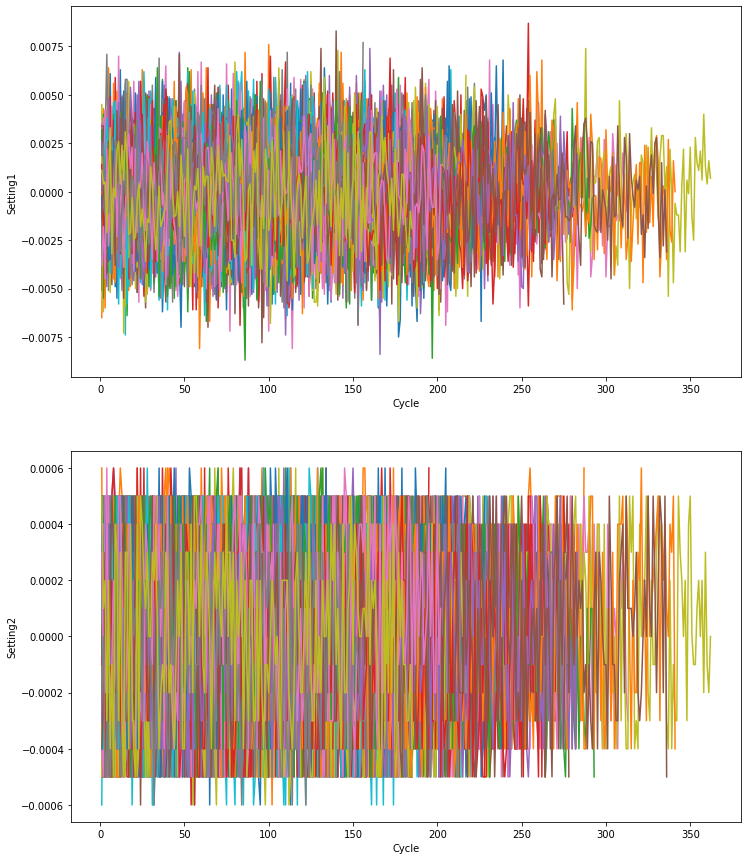

In [19]:
f, axes = plt.subplots(2,1,figsize = (12,15))
for i in range(1,100,1):
    g1 = sns.lineplot(train_df[train_df['Unit'] == i]['Cycle'], train_df[train_df['Unit'] == i]['Setting1'],ax = axes[0])
    g2 = sns.lineplot(train_df[train_df['Unit'] == i]['Cycle'], train_df[train_df['Unit'] == i]['Setting2'],ax = axes[1])
#     g3 = sns.lineplot(train_df[train_df['Unit'] == i]['Cycle'], train_df[train_df['Unit'] == i]['Setting2'].mean(),ax = axes[1])
    


ob_setting1 seems to randomly oscillate with a decreasing std
ob_setting2, averaged over all time serires, gradually icreased with time,slowly at the first and faster at some point in time 
this is might be related with the failure of the engines(all engines in the raining set fail at some time)

Text(0.5, 1.0, 'Engines unit(1 to 100) RUL')

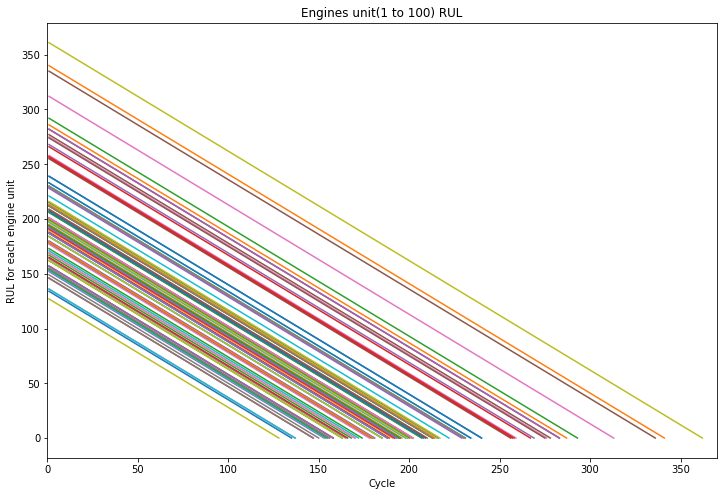

In [20]:
# For all engines RUL
f,ax = plt.subplots(figsize = (12,8))
for i in range(1,100,1):
    x1 = train_df[train_df['Unit'] == i]['Cycle']
    y1 = train_df[train_df['Unit'] == i]['RUL']
    ax = sns.lineplot(x1,y1,)
plt.xlim(0,370)
plt.xlabel('Cycle')
plt.ylabel('RUL for each engine unit')
plt.title('Engines unit(1 to 100) RUL')

In [22]:
# Engines mean RUL
mean_rul = []
for i in range(1,100,1):
    unit_i = np.mean(train_df[train_df['Unit'] == i]['RUL'])
    mean_rul.append(unit_i)

Text(0.5, 1.0, 'Histogram of mean RUL')

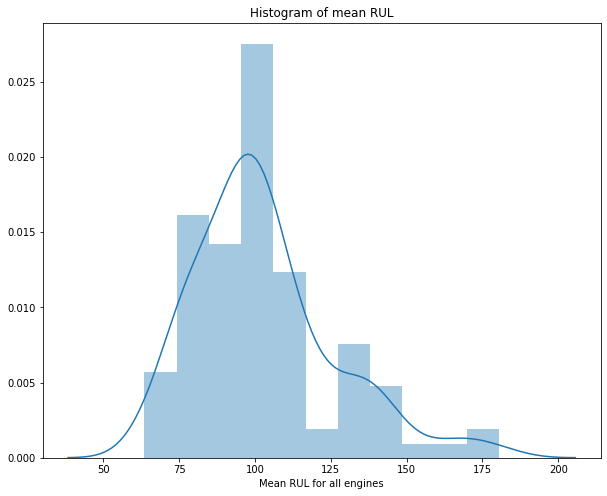

In [23]:
plt.figure(figsize = (10,8))
sns.distplot(mean_rul)
plt.xlabel('Mean RUL for all engines')
plt.title('Histogram of mean RUL')

In [24]:
mean_rul_df = pd.DataFrame(mean_rul)
mean_rul_df.columns = ['Mean rul']
# print(mean_rul_df.max())
# print(mean_rul_df.min())
# print(mean_rul_df.idxmax())
# print(mean_rul_df.idxmin())
print('Best engine 69', 'Worest engine 39')

Mean rul    180.5
dtype: float64
Mean rul    63.5
dtype: float64
Mean rul    68
dtype: int64
Mean rul    38
dtype: int64
Best engine 69 Worest engine 39


In [22]:
train_df.to_csv('train_df.csv',index = None)